# Restauración de imágenes
## Reducción del ruido en el dominio espacial
### Ruido tipo Gaussiano

### Octave

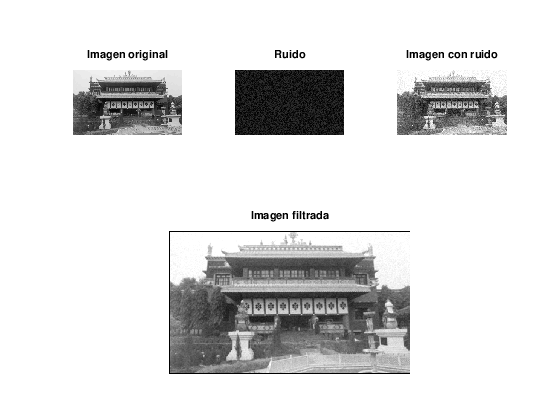

In [13]:
% Filtro del promedio

clc; clear; close all;
pkg load image
A = imread('Images/edificio_china.jpg');
subplot(2,3,1)
imshow(A)
title('Imagen original')

% Crear un ruido aditivo
[m,n] = size(A);
alpha = 0.2;
%N = alpha*randn(m,n); % Matriz aleatoria de dis normal
N = alpha*rand(m,n); % Matriz aleatoria de dis normal
subplot(2,3,2)
imshow(N)
title('Ruido')

% Crear la imagen con ruido
A = im2double(A);
B = A+N;
B1 = im2uint8(B);
subplot(2,3,3)
imshow(B1)
title('Imagen con ruido')

% Filtro del promedio
% Falta implementar esquinas y bordes

A_t = zeros(m,n);

for x= 2:m-1
    for y = 2:n-1
        % Centro es B(x,y)
        Wf1 = B(x-1, y-1) + B(x-1,y) + B(x-1,y+1);
        Wf2 = B(x, y-1) + B(x,y) + B(x,y+1);
        Wf3 = B(x+1, y-1) + B(x+1,y) + B(x+1,y+1);
        A_t(x,y) = 1/9*(Wf1+Wf2+Wf3);
    end
end

A_t = im2uint8(A_t);
subplot(2,3,4:6)
imshow(A_t)
title('Imagen filtrada')

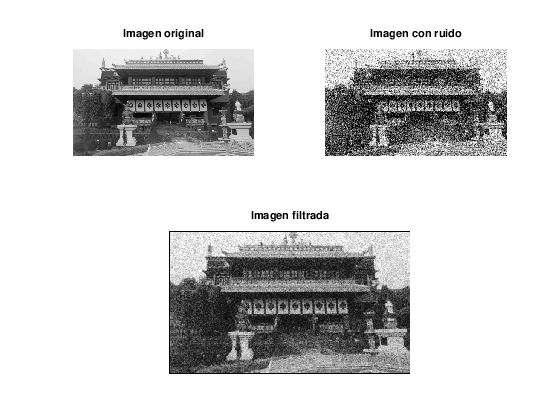

In [19]:
% Filtro del promedio geométrico

clc; clear; close all;
pkg load image
A = imread('Images/edificio_china.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

% Crear un ruido aditivo
[m,n] = size(A);
alpha = 0.2;
N = alpha*randn(m,n); % Matriz aleatoria de dis normal
%N = alpha*rand(m,n); % Matriz aleatoria de dis normal


% Crear la imagen con ruido
A = im2double(A);
B = A+N;
B1 = im2uint8(B);
subplot(2,2,2)
imshow(B1)
title('Imagen con ruido')

% Falta implementar esquinas y bordes

A_t = zeros(m,n);

for x= 2:m-1
    for y = 2:n-1
        % Centro es B(x,y)
        Wf1 = B(x-1, y-1) * B(x-1,y) * B(x-1,y+1);
        Wf2 = B(x, y-1) * B(x,y) * B(x,y+1);
        Wf3 = B(x+1, y-1) * B(x+1,y) * B(x+1,y+1);
        A_t(x,y) = (Wf1*Wf2*Wf3)^(1/9);
    end
end

A_t = im2uint8(real(A_t));
subplot(2,2,3:4)
imshow(A_t)
title('Imagen filtrada')

## Ruido tipo Gaussiano
## Python

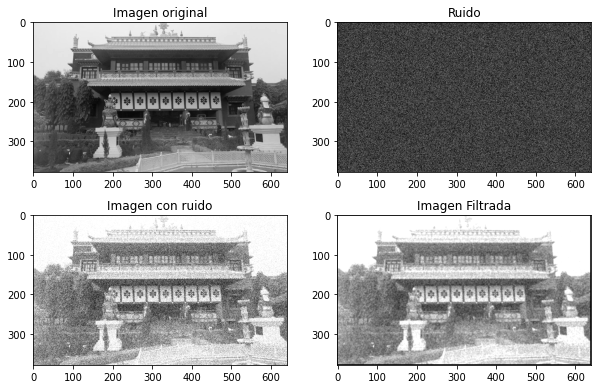

In [97]:
# Filtro del promedio
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)[:,:,1]
A1 = np.uint8(A)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
m,n = A.shape
alpha = 0.5
N = alpha*np.random.rand(m,n)
N1 = np.uint8(N*255)
axs[0,1].set_title("Ruido")
axs[0,1].imshow(N1, cmap='gray', vmin=0, vmax=255)

# Crear la imagen con ruido
B = A/255+N
B1 = B*255
B1 = np.uint8(np.clip(B1, 0, 255))
axs[1,0].set_title("Imagen con ruido")
axs[1,0].imshow(B1, cmap='gray', vmin=0, vmax=255)

# Filtro del promedio
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf1 = B[x-1, y-1] + B[x-1,y] + B[x-1,y+1];
        Wf2 = B[x, y-1] + B[x,y] + B[x,y+1];
        Wf3 = B[x+1, y-1] + B[x+1,y] + B[x+1,y+1];
        A_t[x,y] = (Wf1 + Wf2 +Wf3)/9
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

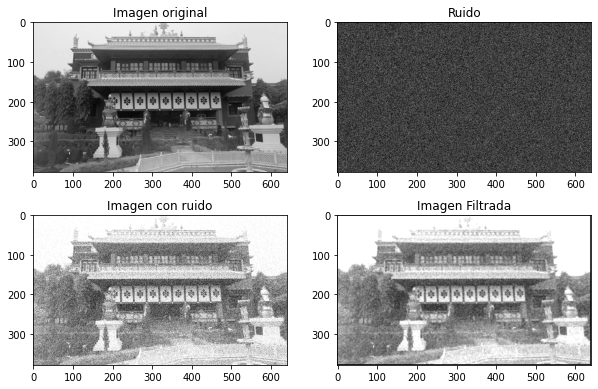

In [99]:
# Filtro del promedio geométrico
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)[:,:,1]
A1 = np.uint8(A)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
m,n = A.shape
alpha = 0.5
N = alpha*np.random.rand(m,n)
N1 = np.uint8(N*255)
axs[0,1].set_title("Ruido")
axs[0,1].imshow(N1, cmap='gray', vmin=0, vmax=255)

# Crear la imagen con ruido
B = A/255+N
B1 = B*255
B1 = np.uint8(np.clip(B1, 0, 255))
axs[1,0].set_title("Imagen con ruido")
axs[1,0].imshow(B1, cmap='gray', vmin=0, vmax=255)

# Filtro del promedio
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf1 = B[x-1, y-1] * B[x-1,y] * B[x-1,y+1];
        Wf2 = B[x, y-1] * B[x,y] * B[x,y+1];
        Wf3 = B[x+1, y-1] * B[x+1,y] * B[x+1,y+1];
        A_t[x,y] = (Wf1 * Wf2 * Wf3)**(1/9)
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

## Ruido Tipo Sal y pimienta 
## Octave

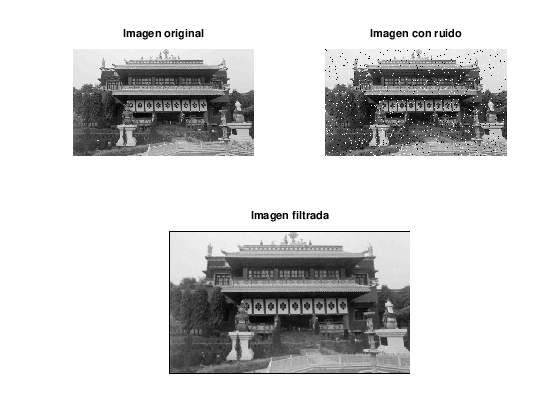

In [16]:
% Filtro del Armónico promedio

clc; clear; close all;
pkg load image
A = imread('Images/edificio_china.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

[m,n] = size(A);
A = im2double(A);

% Crear la imagen con ruido
B=imnoise(A, 'salt & pepper');
B1 = im2uint8(B);
subplot(2,2,2)
imshow(B1)
title('Imagen con ruido')

% Filtro del promedio
% Falta implementar esquinas y bordes

A_t = zeros(m,n);

for x= 2:m-1
    for y = 2:n-1
        % Centro es B(x,y)
        Wf = [B(x-1, y-1) B(x-1,y) B(x-1,y+1) B(x, y-1) B(x,y) B(x,y+1) B(x+1, y-1) B(x+1,y) B(x+1,y+1)];
        Wf = Wf(Wf > 0.0039);
        Wf = Wf.^(-1);
        A_t(x,y) = size(Wf)(2)/(sum(Wf));
    end
end

A_t = im2uint8(A_t);
subplot(2,2,3:4)
imshow(A_t)
title('Imagen filtrada')

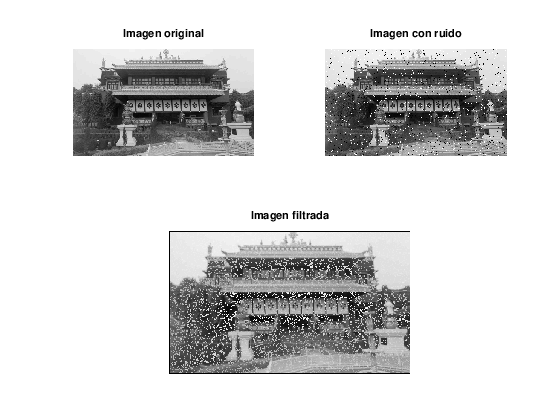

In [39]:
% Filtro contra-armónico promedio de orden R

clc; clear; close all;
pkg load image
A = imread('Images/edificio_china.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

[m,n] = size(A);
A = im2double(A);

% Crear la imagen con ruido
B=imnoise(A, 'salt & pepper');
B1 = im2uint8(B);
subplot(2,2,2)
imshow(B1)
title('Imagen con ruido')

% Filtro del promedio
% Falta implementar esquinas y bordes

A_t = zeros(m,n);

R = 2;
for x= 2:m-1
    for y = 2:n-1
        % Centro es B(x,y)
        Wf1 = [B(x-1, y-1) B(x-1,y) B(x-1,y+1)];
        
        Wf2 = [B(x, y-1) B(x,y) B(x,y+1)];
        
        Wf3 = [B(x+1, y-1) B(x+1,y) B(x+1,y+1)];
        
        A_t(x,y) = sum([Wf1 Wf2 Wf3].^(R+1))/sum([Wf1 Wf2 Wf3].^(R));
    end
end

A_t = im2uint8(A_t);
subplot(2,2,3:4)
imshow(A_t)
title('Imagen filtrada')

m =  378
n =  640


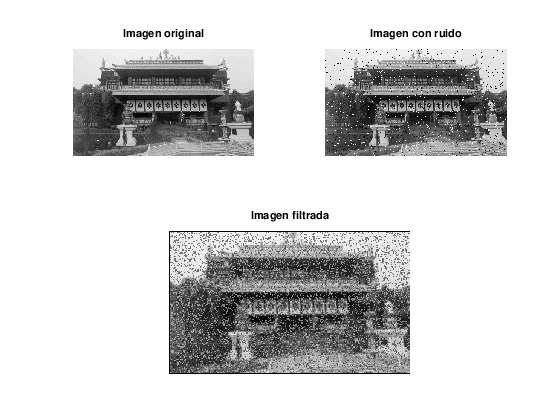

In [4]:
% Filtro del punto medio

clc; clear; close all;
pkg load image
A = imread('Images/edificio_china.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

[m,n] = size(A)
A = im2double(A);

% Crear la imagen con ruido
B=imnoise(A, 'salt & pepper');
B1 = im2uint8(B);
subplot(2,2,2)
imshow(B1)
title('Imagen con ruido')

% Filtro del promedio
% Falta implementar esquinas y bordes

A_t = zeros(m,n);

for x= 2:m-1
    for y = 2:n-1
        % Centro es B(x,y)
        wf = [B(x-1, y-1) B(x-1,y) B(x-1,y+1) B(x, y-1) B(x,y) B(x,y+1) B(x+1, y-1) B(x+1,y) B(x+1,y+1)];
        A_t(x,y) = (max(wf)+min(wf))/2;
    end
end

A_t = im2uint8(A_t);
subplot(2,2,3:4)
imshow(A_t)
title('Imagen filtrada')

## Ruido Tipo Sal y pimienta 
## Python

In [103]:
# Misc -> Correr antes de todo

import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.2
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

<ipython-input-61-8006f78a12c0>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-61-8006f78a12c0>:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


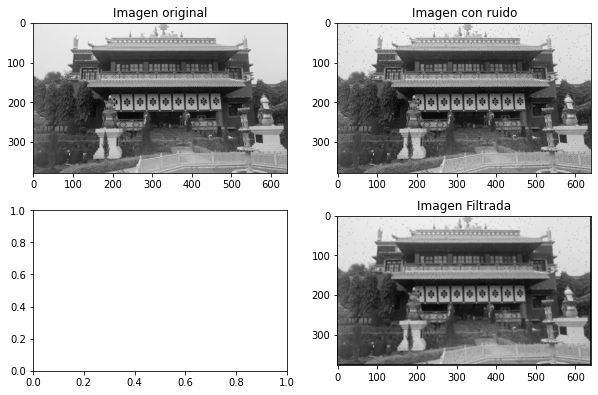

In [118]:
# Filtro del promedio
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
B = noisy("s&p",A)[:,:,1]
A = A[:,:,1]
m,n = A.shape
axs[0,1].set_title("Imagen con ruido")
axs[0,1].imshow(np.clip(B*255,0,255), cmap='gray', vmin=0, vmax=255)

# Filtro del promedio
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf1 = B[x-1, y-1] + B[x-1,y] + B[x-1,y+1]
        Wf2 = B[x, y-1] + B[x,y] + B[x,y+1]
        Wf3 = B[x+1, y-1] + B[x+1,y] + B[x+1,y+1]
        A_t[x,y] = (Wf1 + Wf2 +Wf3)/9
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

<ipython-input-61-8006f78a12c0>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-61-8006f78a12c0>:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


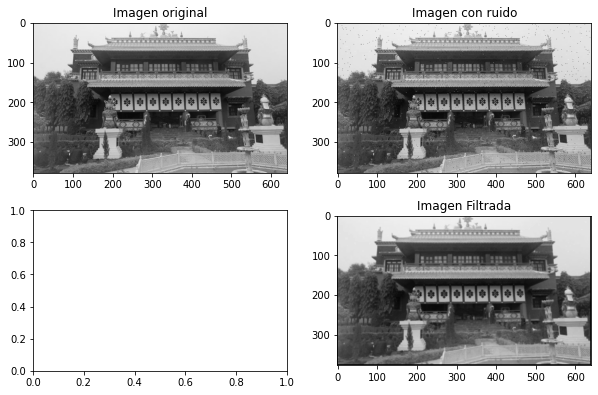

In [128]:
# Filtro del armónico promedio
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
B = noisy("s&p",A)[:,:,1]
A = A[:,:,1]
m,n = A.shape
axs[0,1].set_title("Imagen con ruido")
axs[0,1].imshow(np.clip(B*255,0,255), cmap='gray', vmin=0, vmax=255)

# Filtro del promedio
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf = np.array([B[x-1, y-1], B[x-1,y], B[x-1,y+1], B[x, y-1], B[x,y], B[x,y+1], B[x+1, y-1], B[x+1,y], B[x+1,y+1]])
        Wf = Wf[Wf >= 0.0039]
        Wf = Wf**-1
        A_t[x,y] = Wf.shape[0]/np.sum(Wf)
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

<ipython-input-61-8006f78a12c0>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-61-8006f78a12c0>:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


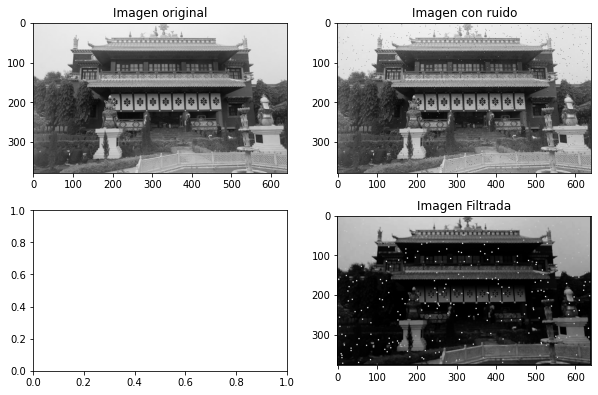

In [129]:
# Filtro contra-armónico promedio de orden R

from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
B = noisy("s&p",A)[:,:,1]
A = A[:,:,1]
m,n = A.shape
axs[0,1].set_title("Imagen con ruido")
axs[0,1].imshow(np.clip(B*255,0,255), cmap='gray', vmin=0, vmax=255)

# Filtro del promedio
R=2
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf = np.array([B[x-1, y-1], B[x-1,y], B[x-1,y+1], B[x, y-1], B[x,y], B[x,y+1], B[x+1, y-1], B[x+1,y], B[x+1,y+1]])
        Wf = Wf**(R+1)
        A_t[x,y] = np.sum( Wf**(R+1))/np.sum( Wf**(R))
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

<ipython-input-61-8006f78a12c0>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-61-8006f78a12c0>:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


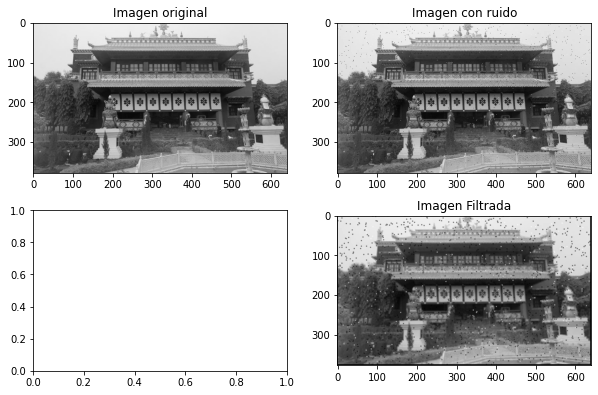

In [130]:
# Filtro del punto medio

from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/edificio_china.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
#imshow(im, cmap='gray', vmin=0, vmax=255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

## Crear ruido aditivo
B = noisy("s&p",A)[:,:,1]
A = A[:,:,1]
m,n = A.shape
axs[0,1].set_title("Imagen con ruido")
axs[0,1].imshow(np.clip(B*255,0,255), cmap='gray', vmin=0, vmax=255)

# Filtro del punto medio
A_t = np.zeros((m,n))
for x in range(1,m-2):
    for y in range(1,n-2):
        # Centro es (i,j)
        Wf = np.array([B[x-1, y-1], B[x-1,y], B[x-1,y+1], B[x, y-1], B[x,y], B[x,y+1], B[x+1, y-1], B[x+1,y], B[x+1,y+1]])
        A_t[x,y] = (np.max(Wf)+np.min(Wf))/2
A_t = np.uint8(np.clip(A_t*255, 0,255))
axs[1,1].set_title("Imagen Filtrada")
axs[1,1].imshow(A_t, cmap='gray', vmin=0, vmax=255)

## Reducción de ruido en el dominio de Frecuencia
## Octave

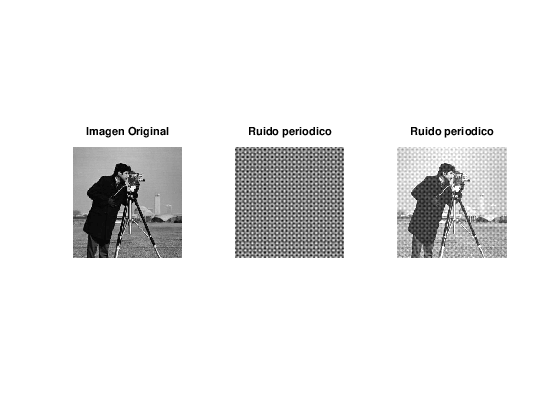

In [28]:
% Ruido periódico

clc; clear; close all;

pkg load image

A = imread('Images/camarografo.jpg');
subplot(1,3,1)
imshow(A)
title('Imagen Original')
N = imread('Images/ruido_periodico.jpg');
subplot(1,3,2)
imshow(N)
title('Ruido periodico')

A = im2double(A);
N = im2double(N);

C = A+0.4*N;
C = im2uint8(C);
subplot(1,3,3)
imshow(C)
title('Ruido periodico')

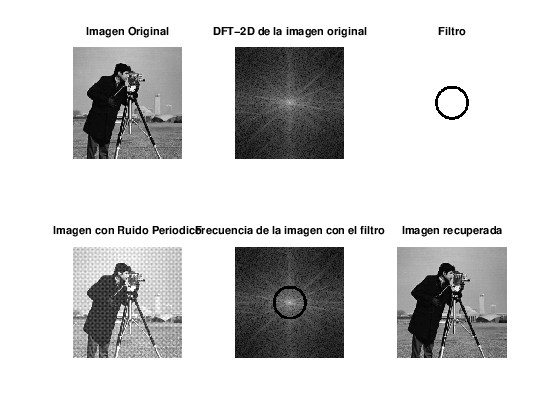

In [43]:
% Ruido periódico

clc; clear; close all;

pkg load image

A = imread('Images/camarografo.jpg');
subplot(2,3,1)
imshow(A)
title('Imagen Original')


A = im2double(A);
F1 = fft2(A);
F2 = fftshift(F1);
subplot(2,3,2)
imshow(log(1+abs(F2)), [])
title('DFT-2D de la imagen original')

N = imread('Images/ruido_periodico.jpg');
N = im2double(N);

C = A+0.35*N;
C = im2uint8(C);
subplot(2,3,4)
imshow(C)
title('Imagen con Ruido Periodico')


[m,n] = size(A);
 
Filtro = ones(m,n);
m1 = round(m/2);
n1 = round(n/2);

D0 = 40;
W = 8;
for x = 1:m
    for y = 1:n
        rad = (x-m1)^2 + (y-n1)^2;
        if rad >= D0^2 && rad <= (D0 + W)^2 
            Filtro(x,y) = 0;
        end
    end
end

subplot(2,3,3)
imshow(Filtro)
title('Filtro')

F2 = F1;
F = fftshift(F2).*Filtro;
subplot(2,3,5)
imshow(log(1+abs(F)), [])
title('Frecuencia de la imagen con el filtro')

F = ifft2(F2.*Filtro);
F = im2uint8(real(F));
subplot(2,3,6)
imshow(F)
title('Imagen recuperada')


## Python

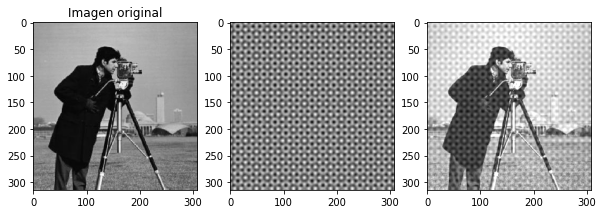

In [148]:
# Ruido periódico

from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(1,3, figsize=(10, 6.5))
axs[0].set_title("Imagen original")

A = Image.open(r'Images/camarografo.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
axs[0].imshow(A1, cmap='gray', vmin=0, vmax=255)

N = Image.open(r'Images/ruido_periodico.jpg')
N = asarray(N)[:,:,1]/255
N1 = np.uint8(N*255)
axs[1].imshow(N1, cmap='gray', vmin=0, vmax=255)

C = np.add(A,N*0.4)
C = np.uint8(np.clip(C*255,0,255))
axs[2].imshow(C, cmap='gray', vmin=0, vmax=255)

Text(0.5, 1.0, 'Transformada de Fourirer')

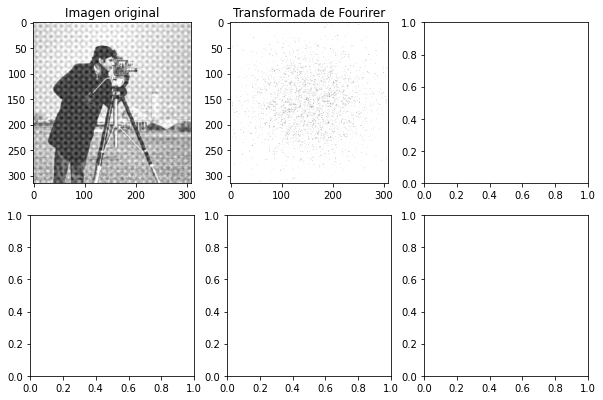

In [193]:
# Ruido periódico

from PIL import Image  
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,3, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Images/imagen_rp.jpg')
A = asarray(A)/255
A1 = np.uint8(A*255)
axs[0,0].imshow(A1, cmap='gray', vmin=0, vmax=255)

B = np.fft.fft2(A)
B2 = np.fft.fftshift(B)
axs[0,1].imshow(np.uint8(np.clip(np.log(np.absolute(B)+1)*255,0,255)), cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title("Transformada de Fourirer")


In [ ]:
)